## Load data

In [1]:
import sys
 
sys.path.insert(0, "../")

In [2]:
from dataAnalysis.data.Filter import Filter
import pandas as pd
from dataAnalysis.Constants import *
from dataAnalysis.DataAnalysis import DataAnalysis

data = pd.read_csv(r"../extdata/sbcdata.csv", header=0)
data_analysis = DataAnalysis(data, mimic_data = None)

/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']
/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']
/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [3]:
y_train = data_analysis.get_y_train()
X_train = data_analysis.get_X_train()

y_test = data_analysis.get_y_test()
X_test = data_analysis.get_X_test()

y_gw_test = data_analysis.get_y_gw()
X_gw_test = data_analysis.get_X_gw()

# y_mimic = data_analysis.get_y_mimic()
# X_mimic = data_analysis.get_X_mimic()

## Metrics definition

In [4]:
from dataAnalysis.Metrics import Evaluation

evaluation = Evaluation(y_test, y_gw_test, X_test, X_gw_test)

## Logistic regression

8.416383266448975
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.044219  0.776133  0.441226   0.008632  0.836916  0.009453
1  Greifswald  0.022229  0.592021  0.373617   0.003746  0.755808  0.004283
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.098585  0.734930  0.445111   0.044091  0.824587  0.046106
1  Greifswald  0.048166  0.608604  0.385754   0.015774  0.774232  0.024801


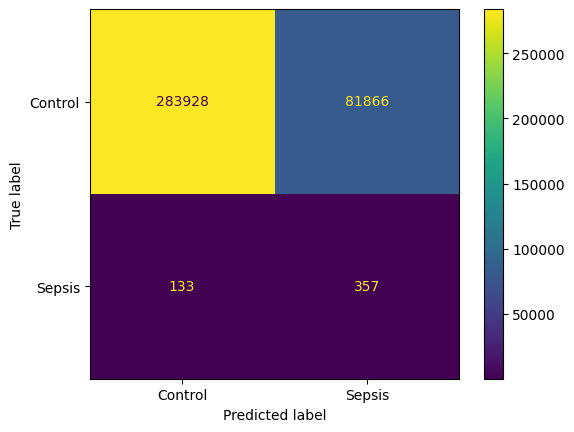

In [10]:
from sklearn.linear_model import LogisticRegression
import time
start = time.time()
logistic_regression = LogisticRegression(random_state=0, solver="liblinear", class_weight="balanced")
logistic_regression.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(logistic_regression))
print(evaluation_ed.get_df_metrics(logistic_regression))
evaluation.plot_confusion_matrix(logistic_regression)

## Decision Tree

3.5844483375549316
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.044252  0.726204  0.424541   0.007894  0.849454  0.009056
1  Greifswald  0.027364  0.631928  0.389278   0.004322  0.787637  0.003666


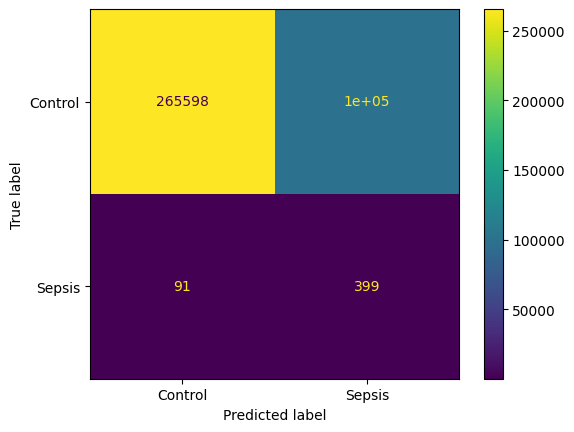

In [11]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()
decision_tree = DecisionTreeClassifier(random_state=42, max_features=6, min_samples_leaf=0.005,
                       min_samples_split=0.03, class_weight="balanced")
decision_tree.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(decision_tree))
evaluation.plot_confusion_matrix(decision_tree)

## XG Boost

8.710988998413086
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.078705  0.980769  0.515829   0.041372  0.875481  0.018280
1  Greifswald  0.039413  0.959589  0.496704   0.014035  0.808292  0.006737


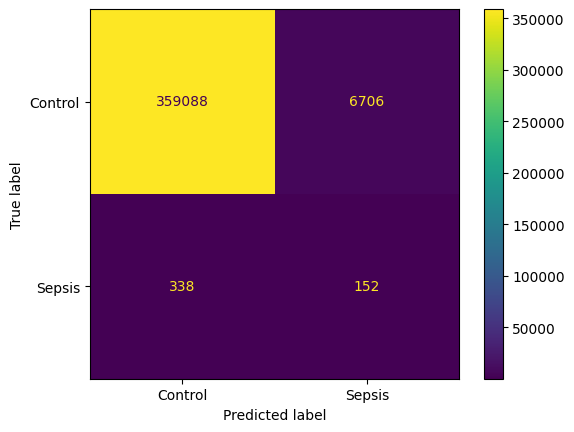

In [13]:
from xgboost import XGBClassifier

start = time.time()
# xgb_classifier = XGBClassifier(tree_method='gpu_hist', 
#                            scale_pos_weight = 660,
#                            n_estimators=478,
#                            max_depth=2,
#                            eta=0.1,
#                            min_child_weight = 7,
#                            max_delta_step= 7,
#                            sampling_method= "uniform")
xgb_classifier = XGBClassifier(tree_method='gpu_hist', 
                           scale_pos_weight = 70,
                           n_estimators=1000,
                           max_depth=2,
                           eta=0.1,
                           min_child_weight = 7,
                           max_delta_step= 7,
                           sampling_method= "uniform")
xgb_classifier.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(xgb_classifier))
evaluation.plot_confusion_matrix(xgb_classifier)

## RUS Boost

/home/dwalke/.local/lib/python3.10/site-packages/imblearn/ensemble/_weight_boosting.py:267: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


229.92461347579956
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.056904  0.864288  0.470080   0.013025  0.867951  0.016951
1  Greifswald  0.035836  0.806673  0.449801   0.006685  0.815194  0.006096


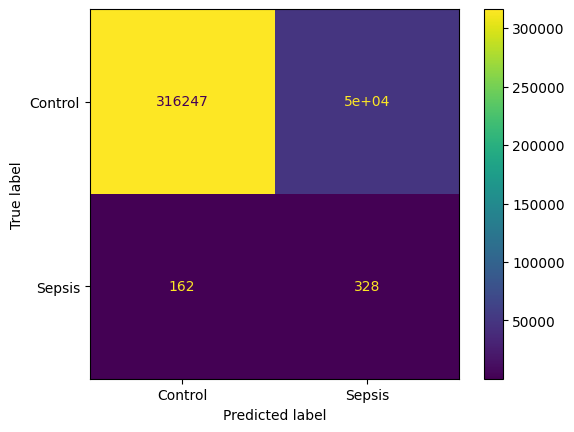

In [37]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time
start = time.time()
rus_boost = RUSBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=79, min_samples_leaf= 5, min_samples_split = 10),
                   learning_rate=0.90369, n_estimators=495,
                   random_state=1714400672, sampling_strategy=35/65)
rus_boost.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(rus_boost))
evaluation.plot_confusion_matrix(rus_boost)

## Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
random_forest = RandomForestClassifier(class_weight={0: 0.0025, 1: 1}, max_leaf_nodes=79,
                           min_samples_leaf=0.0001,
                           min_samples_split=0.0055,
                           n_estimators=500, random_state=42, n_jobs=-1)
random_forest.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(random_forest))
evaluation.plot_confusion_matrix(random_forest)
print(random_forest.feature_importances_)

28.651286840438843
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.060313  0.883983  0.476509   0.014654  0.869703  0.015641
1  Greifswald  0.038284  0.840412  0.460419   0.007608  0.817554  0.005517


NameError: name 'evaluation_ed' is not defined

In [6]:
!{sys.executable} -m pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/18/99/054dc6abe6d706a20cf31dc48a8d3de7b1601a44343def3f512f84e94f97/shap-0.42.1-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached cloudpickle-2.2.1-py3-none-any.whl (25 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.8 MB/s eta 0:00:00a 0:00:01
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [35]:
import shap

start_idx = 0
end_idx = X_test.shape[0]

explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_test[start_idx:end_idx])

In [43]:
shap_values[1][:10].shape

(10, 7)

In [49]:
pred = random_forest.predict(X_test)
pred[pred == 1].shape

(42637,)

## Samples where our model is correct (tp)

In [58]:
import numpy as np
tp_indices = np.where(np.logical_and(y_test == pred, y_test == 1))

## Samples where our model is wrong (fp)

In [63]:
fp_indices = np.where(np.logical_and(y_test != pred, pred == 1))[0]
fp_indices.shape

(42321,)

In [65]:
shap.initjs()
print(random_forest.predict(X_test[fp_indices[:100]]))
shap.force_plot(explainer.expected_value[1], shap_values[1][fp_indices[:100]], X_test[fp_indices[:100]])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


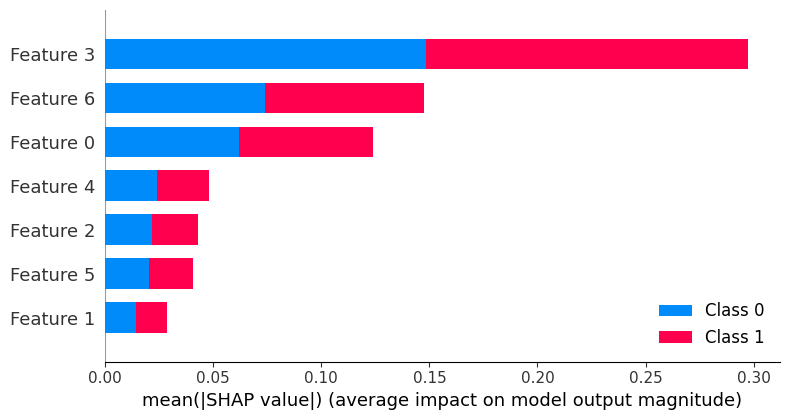

In [36]:
shap.summary_plot(shap_values,X_test)

In [73]:
df = pd.DataFrame({"age":X_test[:, 0]})
sorted_age = df.reset_index().sort_values("age")
sorted_shap = shap_values[1][sorted_age.index.to_numpy()]

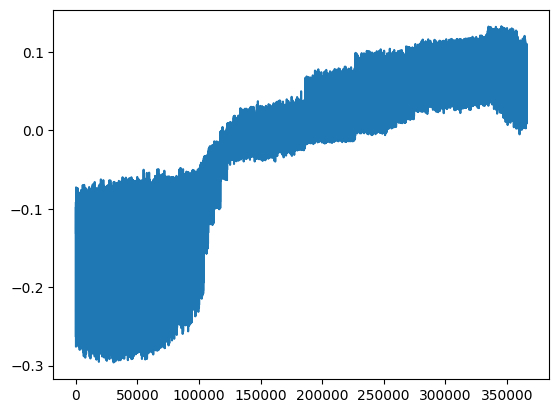

In [76]:
import matplotlib.pyplot as plt
plt.plot(sorted_shap[:, 0])


In [84]:
quantiles = np.quantile(X_test[:,0], np.linspace(0,1,20, endpoint=True))
for i in range(len(quantiles)-1):
    print(20*"#")
    print(quantiles[i])
    print(quantiles[i+1])
    age = X_test[:, 0]
    mask = np.logical_and(age >= quantiles[i], age <= quantiles[i+1])
    quant_shap = shap_values[1][mask]
    print(pd.DataFrame(quant_shap).describe())

####################
18.0
26.0
                  0             1             2             3             4  \
count  21110.000000  21110.000000  21110.000000  21110.000000  21110.000000   
mean      -0.130536     -0.006375     -0.012969     -0.063981     -0.016230   
std        0.045756      0.016378      0.018951      0.113666      0.019558   
min       -0.295185     -0.051985     -0.036784     -0.167692     -0.048110   
25%       -0.142168     -0.016338     -0.023343     -0.125648     -0.025238   
50%       -0.110178     -0.012979     -0.020250     -0.113362     -0.022802   
75%       -0.100528      0.009894     -0.009934     -0.054612     -0.016093   
max       -0.062504      0.045743      0.199035      0.470315      0.205823   

                  5             6  
count  21110.000000  21110.000000  
mean      -0.012438     -0.041935  
std        0.014156      0.057177  
min       -0.036554     -0.103780  
25%       -0.017523     -0.065372  
50%       -0.014746     -0.058367  
75%  

                  0             1             2             3             4  \
count  31213.000000  31213.000000  31213.000000  31213.000000  31213.000000   
mean       0.037479     -0.000225     -0.004686     -0.110605     -0.008618   
std        0.018142      0.014937      0.030864      0.142243      0.032447   
min       -0.006099     -0.045482     -0.062680     -0.227659     -0.049523   
25%        0.027477     -0.014781     -0.028404     -0.194055     -0.028609   
50%        0.035012      0.006595     -0.008277     -0.169939     -0.017855   
75%        0.044249      0.012356      0.009998     -0.085747     -0.000385   
max        0.107025      0.034550      0.205678      0.473242      0.191508   

                  5             6  
count  31213.000000  31213.000000  
mean      -0.003754     -0.013482  
std        0.030852      0.085270  
min       -0.041180     -0.136320  
25%       -0.019868     -0.069938  
50%       -0.015205     -0.045811  
75%       -0.003254      0.002185  


In [ ]:
print("ready")

In [71]:
shap.plots.scatter(shap_values[1][:,2])

AssertionError: The shap_values parameter must be a shap.Explanation object!

In [37]:
random_forest.feature_importances_

array([0.12402096, 0.01293736, 0.05933717, 0.53416078, 0.07289009,
       0.05296211, 0.14369153])

In [38]:
FEATURES

['Age', 'SexCategory', 'HGB', 'WBC', 'RBC', 'MCV', 'PLT']